In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
data = pd.read_csv('primates-morphology.csv')
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
0,37773,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,...,-0.301822,-0.433051,0.037651,-0.279618,-0.421040,Ph,Presbytis,hosei,U,A
1,37772,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,...,0.215340,-0.299550,0.709472,0.876382,-0.150133,Ph,Presbytis,hosei,F,A
2,22276,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,...,-0.481468,-0.243025,-0.537644,-0.140292,0.082158,Pr,Presbytis,rubicunda,U,A
3,37776,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,...,0.586941,-0.043639,-0.518699,-1.051100,0.542354,Pr,Presbytis,rubicunda,M,A
4,37777,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,...,0.653851,0.718319,0.798722,-0.396749,0.844772,Pr,Presbytis,rubicunda,F,A


## data analysis 1
We can see that there are 29 columns with data. the first column is the observation number/ ID and the last 5 columns is information about the observation. we will only use columns 1-30 and the species column to check our clustering results.

There are no missing values and all the observations are float64. the species column is a string, which will be converted later to numerical, since some algorithms only accept numerical data.


In [3]:
data.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,32304.406061,5.537129,1.196007,-0.125596,0.774423,-0.161111,-0.182550,-0.077955,0.180683,0.132617,...,0.057334,-0.014223,0.013269,-0.002892,0.005006,0.003208,-0.001137,-0.002748,-0.012738,-0.013131
std,10702.789245,99.061556,69.971050,56.627559,18.591984,11.336600,8.710069,5.463093,5.214248,4.520787,...,1.254471,1.161247,0.971599,0.932425,0.865874,0.750532,0.720479,0.484438,0.461879,0.374258
min,5547.000000,-201.591249,-111.659165,-114.986835,-54.636918,-19.375303,-24.431319,-54.611282,-20.855026,-18.487708,...,-3.793245,-2.894577,-3.849517,-1.838070,-2.274559,-2.037714,-2.934118,-1.245955,-2.115305,-1.128128
25%,23812.000000,-58.767559,-44.542377,-45.981261,-12.328664,-7.348686,-5.823589,-1.389680,-2.572926,-2.279476,...,-0.697783,-0.739499,-0.482541,-0.585089,-0.587203,-0.413921,-0.411248,-0.300449,-0.320591,-0.248282
50%,35640.000000,-4.994670,18.343281,-2.090244,4.082730,-2.158090,-1.071286,-0.124301,-0.379776,-0.057433,...,0.086293,-0.103932,0.123128,-0.072030,-0.018886,-0.023107,-0.022457,0.001251,-0.018000,-0.010527
75%,39390.000000,89.480991,42.633134,32.805157,16.969797,3.716401,5.078963,1.575336,3.017432,3.199454,...,0.784991,0.633467,0.526249,0.512882,0.621830,0.474782,0.418680,0.274560,0.277566,0.268744
max,61414.000000,192.170450,433.444316,142.161119,33.486208,68.005131,21.570367,18.598186,20.232449,18.859660,...,3.300278,3.376167,3.423704,4.006407,3.131717,2.052453,2.727110,1.319978,1.653007,0.844772


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    165 non-null    int64  
 1   0             165 non-null    float64
 2   1             165 non-null    float64
 3   2             165 non-null    float64
 4   3             165 non-null    float64
 5   4             165 non-null    float64
 6   5             165 non-null    float64
 7   6             165 non-null    float64
 8   7             165 non-null    float64
 9   8             165 non-null    float64
 10  9             165 non-null    float64
 11  10            165 non-null    float64
 12  11            165 non-null    float64
 13  12            165 non-null    float64
 14  13            165 non-null    float64
 15  14            165 non-null    float64
 16  15            165 non-null    float64
 17  16            165 non-null    float64
 18  17            165 non-null    

<AxesSubplot:>

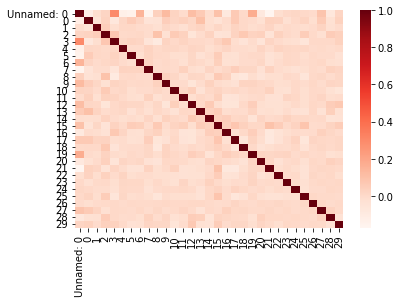

In [5]:
'''correlation plot'''
corr = data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap=plt.cm.Reds)

In [24]:
'''data skewness'''
data.skew(axis = 0)

/var/folders/z7/01ndtdr56pn86m2ys1lwmlnh0000gn/T/ipykernel_64708/1449452240.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Unnamed: 0   -0.361835
0             0.009842
1             1.272854
2             0.408304
3            -0.553588
4             2.358456
5             0.262781
6            -5.635667
7             0.348291
8             0.048778
9            -0.118507
10           -0.480534
11           -0.459593
12           -1.350822
13            0.017725
14            1.267799
15            0.023271
16           -0.112908
17           -0.025797
18            0.049919
19           -0.702592
20           -0.097343
21            0.144393
22           -0.265555
23            0.782396
24            0.192550
25            0.093233
26            0.211428
27            0.081003
28           -0.114840
29           -0.251496
dtype: float64

### data analysis 1.1
drawing conclusions about the data is very difficult at this point using the techniques used above, since the data is in coordinates space. This way ususal data analysis is not usefull.

In [7]:
df = data.copy()
df.drop('Abbreviation', axis=1, inplace=True)
df.drop('Genus', axis=1, inplace=True)
df.drop('Sex', axis=1, inplace=True)
df.drop('Age', axis=1, inplace=True)
df = df.iloc[: , 1:]

---

# PCA
first, i will do PCA, to find the most important features, which makes it eassier to cluster the data.

In [8]:
plotPCA1 = 0
plotPCA2 = 1

data2 = df.drop('Species', axis=1)
X = data2

pca = PCA(n_components=3)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components2 = []
for i in components:
    components2.append([i[plotPCA1], i[plotPCA2]])

fig = px.scatter(components2, x=0, y=1, color=df['Species'])

for i, feature in enumerate(data2.columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, plotPCA1],
        y1=loadings[i, plotPCA2]
    )
    fig.add_annotation(
        x=loadings[i, plotPCA1],
        y=loadings[i, plotPCA2],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

#### 3d scatter plot, with each axis being a different principal component

In [9]:
pca = PCA(n_components=3)
components = pca.fit_transform(data2)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
)
fig.show()

### evaluation of PCA
from the pca-plots, we can see that it is very dificult to cluster this data, a lot of the clusters are not very well seperated, which makes clustering very hard.

---

# data selection
as shown in the plots above, we can see that the data is not well seperated, so we need to select the data that is well seperated. i will first seperate the ten species with the most samples.

In [10]:
dups = df.pivot_table(index = ['Species'], aggfunc ='size')
sorted_species = (dups.sort_values(ascending=False))[:6]
print(sorted_species.keys())
'''keep only rows containing the top # species'''
df2 = df[df['Species'].isin(sorted_species.keys())]


Index(['lar', 'cristata', 'mitis', 'badius', 'polykomos', 'torquatus'], dtype='object', name='Species')


In [11]:
species =  df2['Species']
#df = px.data.iris()
data2 = df2.drop('Species', axis=1)
X = data2

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
#print(components)
fig1 = px.scatter(components, x=0, y=1, color=species)

for i, feature in enumerate(data2.columns):
    fig1.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig1.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature[:3],
    )


In [12]:
#Import required module
from sklearn.cluster import KMeans
import plotly.graph_objects as go
#Initialize the class object
kmeans = KMeans(n_clusters= 6)
 
#predict the labels of clusters.
kmeans.fit(data2)
y_kmeans = kmeans.predict(data2)
centers = kmeans.cluster_centers_

centers2= []
for i in centers:
    centers2.append([i[0], i[1]])
print(centers2)

fig2 = px.scatter(centers2, x=0, y=1, range_color = [100, 500], size_max = 100)
fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()

[[-92.38046844258017, -30.864687717250277], [107.03712343422296, 30.492743756423636], [10.137471122060749, 32.126951552056305], [-42.16630731930894, -91.01604189320307], [138.72803785784885, -101.87316973103566], [78.62315183992824, 58.42462716251437]]


### evaluation
we can see that the chosen species are not very well seperated. this is a non-working approach. i will try to find species that are easier to cluster and run the same algorithm again. 

--------------------

### Data selection 2
from the PCA plots above, we can see that the following species well separated:
- gorilla
- albigena
- talapoin
- badius
- anubis

with this list of primates, i will continue.

In [13]:
plotPCA1 = 0
plotPCA2 = 1

list_of_desired_species = ['gorilla', 'albigena', 'talapoin', 'badius', 'anubis']



df2 = df[df['Species'].isin(list_of_desired_species)]

data2 = df2.drop('Species', axis=1)
X = data2

pca = PCA(n_components=3)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components2 = []
for i in components:
    components2.append([i[plotPCA1], i[plotPCA2]])

fig = px.scatter(components2, x=0, y=1, color=df2['Species'])

fig.update_yaxes(
scaleanchor = "x",
scaleratio = 1,
)

for i, feature in enumerate(data2.columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, plotPCA1],
        y1=loadings[i, plotPCA2]
    )
    fig.add_annotation(
        x=loadings[i, plotPCA1],
        y=loadings[i, plotPCA2],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

### evaluation
we can see that with the chosen animals, the clusters are suitably separated. the only point of confusion could be the albigene, which is close to the talapoin.

In [14]:
#this piece of code is to enumarate the species in the dataframe, since some algorithms have dificulties with the species names.

species_series = df2.Species
df2.Species = pd.Categorical(df2.Species)
df2.Species = df2.Species.cat.codes
df2.head()

/var/folders/z7/01ndtdr56pn86m2ys1lwmlnh0000gn/T/ipykernel_64708/752081229.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z7/01ndtdr56pn86m2ys1lwmlnh0000gn/T/ipykernel_64708/752081229.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Species
15,155.887844,-82.907261,-5.148445,6.597369,2.731860,-3.810235,-0.819725,0.850604,-0.157577,-0.052748,...,0.029231,1.212677,-0.463466,0.345521,1.120565,-0.359339,0.018604,0.307960,0.268744,4
16,153.083389,-85.735742,-3.255175,10.349544,6.696116,-4.461611,-1.503843,-1.093252,1.760146,-0.547969,...,0.066467,0.500971,-0.253714,0.401869,-0.303178,0.025247,0.220553,0.155178,0.510207,4
17,167.552306,-99.653398,-13.551779,1.769345,4.609142,-0.301289,-0.838139,-4.281979,0.254833,-0.316636,...,0.724975,-0.057630,0.754196,-0.394274,0.295847,0.188395,0.044689,-0.401908,-0.134499,4
18,165.318889,-87.389364,-15.970493,10.783070,2.353209,-0.534187,-2.654530,0.658179,-0.057433,-1.395649,...,0.118089,0.377068,0.280485,-0.785905,1.123303,0.514168,0.273705,-0.031242,0.388325,4
19,163.951435,-90.264580,-10.711944,4.082730,0.805236,0.212165,-1.540209,-1.276854,-0.320377,-1.350304,...,-0.965179,0.270429,-0.830071,-0.059577,0.975433,0.065369,0.191521,0.117691,0.480637,4


In [15]:
clustering_data = df2.drop('Species', axis=1)

--------

# DBscan
i chose DBscan, since it is pretty robust to outliers and can dicover weridly shaped clusters. first, i will try to find the best parameters for this algorithm, after which i implement it and evaluate it.

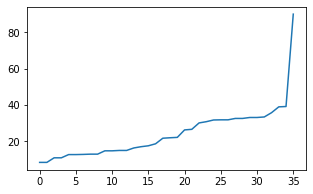

In [16]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(clustering_data) # fitting the data to the object
distances,indices=nbrs.kneighbors(clustering_data) # finding the nearest neighbours

# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

We can see that the elbow point is at 34, so we will normally use this as our eps values in the db-scan. however, using trial and error, I found that using 50 is a better value.

In [17]:
'''DBscan'''
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=50, min_samples=5).fit(clustering_data)
identified_clusters = dbscan.fit_predict(clustering_data)
labels = dbscan.labels_

data_with_clusters = clustering_data.copy()
data_with_clusters['Clusters'] = identified_clusters

plotPCA1 = 0
plotPCA2 = 1

pca = PCA(n_components=3)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components2 = []
for i in components:
    components2.append([i[plotPCA1], i[plotPCA2]])

fig = px.scatter(components2, x=0, y=1, color=data_with_clusters['Clusters'], title= 'DBSCAN')
fig.show()

fig = px.scatter(components, x=0, y=1, color=species_series, title= 'actual values')
fig.show()

### evaluation of the dbscan
we can see that the clusters are well separated, however, the DB-scan makes 3 clustering mistakes. it assumes the  outliers of anubis belong to the gorilla cluster, which is not right. it also assumes the albigena outlier belongs to the talapoin, which is predictable, since this outlier seem to way better fit in the talapoin cluster.

__________

# Kmeans Clustering
i chose to use the kmeans clustering algorithm, since it is an model perfectly suitable for finding groups in a dataset, with unlabeled data. the downside of k-means clustering is that it has trouble clustering data where clusters are of varying sizes and density, which is not the case in our dataset.

In [18]:
kmeans = KMeans(5)
kmeans.fit(clustering_data)

identified_clusters = kmeans.fit_predict(clustering_data)
identified_clusters

data_with_clusters = clustering_data.copy()
data_with_clusters['Clusters'] = identified_clusters



In [19]:
plotPCA1 = 0
plotPCA2 = 1

pca = PCA(n_components=3)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components2 = []
for i in components:
    components2.append([i[plotPCA1], i[plotPCA2]])

fig = px.scatter(components2, x=0, y=1, color=data_with_clusters['Clusters'], title= 'Kmeans')
fig.show()

fig = px.scatter(components, x=0, y=1, color=species_series, title= 'actual values')
fig.show()

### evaluation of k-means clustering
We can see that K-clustering on the chosen species works very good, it makes two mistakes, by clustering the albigena at (-145.6, -67.8) and the anubis at (2.1, 18.4) wrong. this is understandable, since these are outliers of the normal cluster.

__________________________________________________________

# XGboost
i chose to use the XGboost algorithm, since it is one of the most popular algorithm in the machine learning community. it has proven itself on multiple machine learning contests, so it is interesting to test this boosting algorithm out. boosting is a technique that is used to improve the performance of a model by adding seperate models together.

In [20]:
'''xgboost'''
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(clustering_data, df2.Species)
identified_clusters = xgb.predict(clustering_data)

data_with_clusters = clustering_data.copy()
data_with_clusters['Clusters'] = identified_clusters

In [21]:
plotPCA1 = 0
plotPCA2 = 1

pca = PCA(n_components=3)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components2 = []
for i in components:
    components2.append([i[plotPCA1], i[plotPCA2]])

fig = px.scatter(components2, x=0, y=1, color=data_with_clusters['Clusters'], title= 'XGBoost')
fig.show()

fig = px.scatter(components, x=0, y=1, color=species_series, title= 'actual values')
fig.show()

### evaluation of xgboost
_somehow the xgboost algorithm does not produce the same results everytime, this is why the evaluation might be different from the observation above. This behaviour could be explained by a different random-seed or floating point issues._

as seen, xg-boost shows a very good fit and does not make any mistakes. However, i think the model is overfitting, since it clusters the albigena outlier correctly to the albigena, which could cause problems in the future.

---

# Gaussian mixture


In [64]:
'''gaussian mixture'''
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(clustering_data, df2.Species)
identified_clusters = gmm.predict(clustering_data)

plotPCA1 = 0
plotPCA2 = 1

pca = PCA(n_components=3)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components2 = []
for i in components:
    components2.append([i[plotPCA1], i[plotPCA2]])

fig = px.scatter(components2, x=0, y=1, color=data_with_clusters['Clusters'], title= 'Gaussian Mixture')
fig.show()

fig = px.scatter(components, x=0, y=1, color=species_series, title= 'actual values')
fig.show()


---

# conclusion
from the results above, i found that the data was not well seperated in the beginning and in my opinion not usuable for training a clustering algorithm. after choosing the right animals, the data clusters were sufficiently seperated, after which training the clustering algorithms could be done. i chose several algorithms and found that the xgboost algorithm was the best. This is to be expected, since it is a boosting algorithm, and the other algorithms are not boosting algorithms. None of the algorithms were performing bad, which is most likely the result of not testing them to the fullest by using already very well seperated clusters.

i chose to not seperate the data in a training and testing dataset, since the dataset is very small and i believe doing it this way gives a suitably clear result if the algorithm is working correctly.